# Import Data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
from IPython.display import Image
import os

fil_path = "../data/srt/srt_csv/"
dir_list = os.listdir(fil_path)

''' Settings '''
sns.set_style("white")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

''' Load and concatinate CSV files into single dataframe'''

files=[]
for path in dir_list:
    files.append(
        pd.read_csv(fil_path+path,index_col=0)
    )
df_sub = pd.concat(files)

csv_names = ['../data/imdb_unique_prod-2018-04-21_0924.csv']
files = []
for path in csv_names:
    files.append(
        pd.read_csv(path,index_col=0)
    )
df_movies = pd.concat(files)
df_movies = df_movies.loc[:, ~df_movies.columns.str.contains('^Unnamed')]

### Remove unamed indicies

#cols = df_movies.columns.tolist()
#cols = cols[-2:] + cols[:-2]
#df_movies = df_movies[cols]

KeyboardInterrupt: 

In [ ]:
## Plot yearly durations for documentation
def plot_yearly_durations():
    plt.style.use('fivethirtyeight')
    df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']
    df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
    df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
    #df_movies['genre'] = df_movies['genre'].dropna()
    df_submov = pd.merge(df_sub, df_movies, on='title')
    df_submov = df_submov[df_submov['year']>1930]
    df_submov_byyear = df_submov.groupby('year').agg(lambda x: x[x>0].median())
    #df_submov_byyear = df_submov.groupby('year').agg(lambda x: x[x>0].mean())
    df_submov_byyear = df_submov_byyear.reset_index()
    df_submov_byyear.plot(x='year',y='line_duration',figsize=(15,10),xticks=df_submov_byyear['year'][::2],rot=-65)

# Convert Currencies

In [19]:
from currency_converter import CurrencyConverter
from re import sub
import math

# Parse currencies

c = CurrencyConverter()
def parse_currency(value):
    value = str(value)
    currency_type = sub(r'[?!^\d.]', '', value ).replace(',','').rstrip()
    currency_amount = sub(r'[^\d.]', '', value)
    if currency_type == "$":
        currency_type = 'USD'
    if currency_type == "€":
        currency_type = 'EUR'
    if currency_type == "£":
        currency_type = 'GBP'
    if currency_type == "RUR":
        currency_type = 'USD'
    if currency_type == "FRF":
        currency_type = 'EUR'
    if currency_type == "DEM":
        currency_type = 'EUR'
    if currency_type == "":
        currency_type = 'USD'        
    return int(math.ceil(c.convert(currency_amount, currency_type, 'USD')))    

# Turn currency strings to floats

df_movies = df_movies[df_movies['gross_usa'].notnull()]
df_movies = df_movies[df_movies['gross_usa_weekend'].notnull()]
df_movies = df_movies[df_movies['gross_worldwide'].notnull()]
df_movies = df_movies[df_movies['budget'].notnull()]

#df_movies['gross_usa'] = df_movies['gross_usa'].apply(clean_imdb_box_office)
df_movies['budget'] = df_movies['budget'].apply(parse_currency)
df_movies['gross_usa'] = df_movies['gross_usa'].apply(parse_currency)
df_movies['gross_usa_weekend'] = df_movies['gross_usa_weekend'].apply(parse_currency)
df_movies['gross_worldwide'] = df_movies['gross_worldwide'].apply(parse_currency)

df_movies.head(5)

,budget,cast,color,country,description,director,genre,gross_usa,gross_usa_weekend,gross_worldwide,imdb_critic_reviews_total,imdb_popularity,imdb_rating,imdb_ratings_total,imdb_user_reviews_total,language,metacritic_rating,mpaa_rating,poster_image,production_co,release_date,runtime,title,year
0,6000000,"Marlon Brando,Al Pacino,James Caan,Richard S. ...",Color,USA,When the aging head of a famous crime family d...,Francis Ford Coppola,"Crime, Drama",134966411,302393,245066411,223.0,111,9.2,"1,328,623","2,707",English,100.0,R,https://ia.media-imdb.com/images/M/MV5BM2MyNjY...,Paramount Pictures,24 March 1972 (USA),175.0,The Godfather,1972
20,55000000,"Marlon Brando,Gene Hackman,Christopher Reeve,N...",Color,USA,Just before the destruction of the planet Kryp...,Richard Donner,"Action, Adventure, Drama, Sci-Fi",134218018,7465343,166200000,176.0,"1,423",7.3,"140,063",517,English,86.0,PG,https://ia.media-imdb.com/images/M/MV5BOWU0ZGE...,Dovemead Films,15 December 1978 (USA),143.0,Superman,1978
34,8724800,"Ugo Tognazzi,Michel Serrault,Claire Maurier,Ré...",Color,France,Two gay men living in St. Tropez have their li...,Édouard Molinaro,Comedy,20424259,18709,21400826,31.0,NaN,7.3,"8,367",41,French,NaN,R,https://ia.media-imdb.com/images/M/MV5BNzBiZTQ...,Da Ma Produzione,30 March 1979 (USA),91.0,La Cage aux Folles,1978
43,11000000,"Tom Skerritt,Sigourney Weaver,Veronica Cartwri...",Color,UK,"In the distant future, the crew of the commerc...",Ridley Scott,"Horror, Sci-Fi",78900000,3527881,203630630,424.0,340,8.5,"663,691","1,233",English,83.0,R,https://ia.media-imdb.com/images/M/MV5BNDNhN2I...,Brandywine Productions,22 June 1979 (USA),116.0,Alien,1979
48,14000000,"Roger Moore,Barbara Bach,Curd Jürgens,Richard ...",Color,UK,James Bond is back again and his new mission i...,Lewis Gilbert,"Action, Adventure, Thriller",46800000,1347928,185400000,111.0,"2,607",7.1,"84,603",289,English,NaN,PG,https://ia.media-imdb.com/images/M/MV5BNDk3ODM...,Eon Productions,3 August 1977 (USA),125.0,The Spy Who Loved Me,1977


# Generate time columns

In [20]:
# Calculate length of line dialogue 

df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']

# Calculate length of line dialogue
# (THIS LINE TOTALLY CHNAGES GRAPHS, IF SHIFT IS 1 vs -1)

df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
#df_movies['genre'] = df_movies['genre'].dropna()



# Merge subtitle and movies

In [21]:
# Merge subtitle and movie dataframe
#df_submov = pd.merge(df_sub, df_movies[['title','year','genre','budget','imdb_rating','imdb_popularity','color','director','country','metacritic_rating','mpaa_rating','gross_usa','gross_usa_weekend','gross_worldwide']], on='title')
df_submov = pd.merge(df_sub, df_movies, on='title')

### Parse and merge categoricals (genre)

>TODO: Make sure this join is correct
Seems good :)

In [5]:
import patsy
# Categorize genres
x = df_submov['genre'].str.split('\s*,\s*', expand=True).stack()
df_new = pd.crosstab(x.index.get_level_values(0), x.values).iloc[:, 1:]
df_submov = df_submov.join(df_new)

# Categorize mpaaa
x = df_submov['mpaa_rating'].str.split('\s*,\s*', expand=True).stack()
df_new = pd.crosstab(x.index.get_level_values(0), x.values).iloc[:, 1:]
df_submov = df_submov.join(df_new)

# Categorize color
x = df_submov['color'].str.split('\s*,\s*', expand=True).stack()
df_new = pd.crosstab(x.index.get_level_values(0), x.values).iloc[:, 1:]
df_submov = df_submov.join(df_new)

#df_submov[df_submov['genre'].str.contains('Animation')]
#df_submov['genre_animation'] = 0
#df_submov['genre_animation'] = pd.np.where(df_submov['genre'].str.contains("Animation"),df_submov['genre'], 1)
#df_submov[df_submov['genre_animation'] == 1]


''' patsy handles the dummy variable trap'''
#df_submov['genre'] = df_submov['genre'].str.split(',').str[0]
#X=patsy.dmatrix('genre',data=df_submov,return_type='dataframe')
#df_submov.join(X).groupby('title').mean()

' patsy handles the dummy variable trap'

In [7]:
# Test genres
df_submov[df_submov['title'].str.contains('Blade')].head()

,startTime,endTime,text,title,line_duration,line_delta,budget,cast,color,country,description,director,genre,gross_usa,gross_usa_weekend,gross_worldwide,imdb_critic_reviews_total,imdb_popularity,imdb_rating,imdb_ratings_total,imdb_user_reviews_total,language,metacritic_rating,mpaa_rating,poster_image,...,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Not Rated,PG,PG-13,R,Color
458655,1000,4073,Subtitles downloaded from Podnapisi.NET,Blades of Glory,3073,-1781410,61000000,"Will Ferrell,Jon Heder,Will Arnett,Amy Poehler...",Color,USA,When rivalry between the world's best men's fi...,Josh Gordon,"Comedy, Sport",118594548,33014202,145708642,147.0,"3,312",6.3,"140,759",246,English,64.0,PG-13,https://ia.media-imdb.com/images/M/MV5BMTY3MDM...,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
458656,107115,108533,I'll take him.,Blades of Glory,1418,103042,61000000,"Will Ferrell,Jon Heder,Will Arnett,Amy Poehler...",Color,USA,When rivalry between the world's best men's fi...,Josh Gordon,"Comedy, Sport",118594548,33014202,145708642,147.0,"3,312",6.3,"140,759",246,English,64.0,PG-13,https://ia.media-imdb.com/images/M/MV5BMTY3MDM...,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
458657,139439,144194,Jimmy MacElroy. The crowd swooningas he comes ...,Blades of Glory,4755,30906,61000000,"Will Ferrell,Jon Heder,Will Arnett,Amy Poehler...",Color,USA,When rivalry between the world's best men's fi...,Josh Gordon,"Comedy, Sport",118594548,33014202,145708642,147.0,"3,312",6.3,"140,759",246,English,64.0,PG-13,https://ia.media-imdb.com/images/M/MV5BMTY3MDM...,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
458658,144820,148247,They are giving him the loveand he is giving i...,Blades of Glory,3427,626,61000000,"Will Ferrell,Jon Heder,Will Arnett,Amy Poehler...",Color,USA,When rivalry between the world's best men's fi...,Josh Gordon,"Comedy, Sport",118594548,33014202,145708642,147.0,"3,312",6.3,"140,759",246,English,64.0,PG-13,https://ia.media-imdb.com/images/M/MV5BMTY3MDM...,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
458659,153538,155206,Here it comes.,Blades of Glory,1668,5291,61000000,"Will Ferrell,Jon Heder,Will Arnett,Amy Poehler...",Color,USA,When rivalry between the world's best men's fi...,Josh Gordon,"Comedy, Sport",118594548,33014202,145708642,147.0,"3,312",6.3,"140,759",246,English,64.0,PG-13,https://ia.media-imdb.com/images/M/MV5BMTY3MDM...,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


# Groupby

In [6]:
# Group by title

df_submov_bytitle = df_submov.groupby('title').agg(lambda x: x[x>0].mean())

df_submov_bytitle = df_submov_bytitle[df_submov_bytitle.columns.difference(['startTime','endTime'])]
df_submov_bytitle = df_submov_bytitle.fillna(0)

df_submov_bytitle.head(5)

,Adventure,Animation,Biography,Color,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Not Rated,PG,PG-13,R,Romance,Sci-Fi,Sport,Thriller,War,Western,budget,gross_usa,gross_usa_weekend,gross_worldwide,imdb_critic_reviews_total,imdb_rating,line_delta,line_duration,metacritic_rating,runtime,year
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000000,136189294,45073479,320689294,56.0,5.7,4178.950,2766.305,0.0,103.0,1996
12 Years a Slave,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20000000,56671993,923715,187733202,601.0,8.1,3266.731,2086.765,0.0,134.0,2013
13 Hours,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,50000000,52853219,16000000,69411370,232.0,7.3,1662.304,1859.239,0.0,144.0,2016
2 Fast 2 Furious,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,76000000,127154901,50472480,107376378,154.0,5.9,3314.502,2251.820,0.0,107.0,2003
2 Guns,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,61000000,75612460,27059130,131940411,270.0,6.7,1975.299,1787.000,0.0,109.0,2013


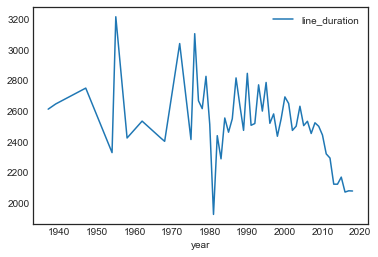

In [9]:
# Plot for MVP
df_submov_byyear = df_submov.groupby('year').agg(lambda x: x[x>0].mean())
df_submov_byyear = df_submov_byyear.reset_index()
df_submov_byyear.plot(x='year',y='line_duration')

# Plot scatter

In [7]:
# Filter outliers
df_submov_bytitle = df_submov_bytitle[(df_submov_bytitle['line_duration'] < 5000) & (df_submov_bytitle['line_delta'] < 10000) ]

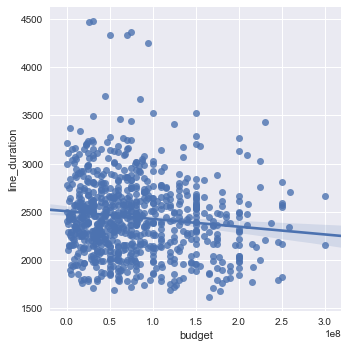

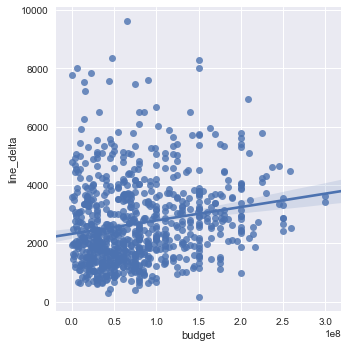

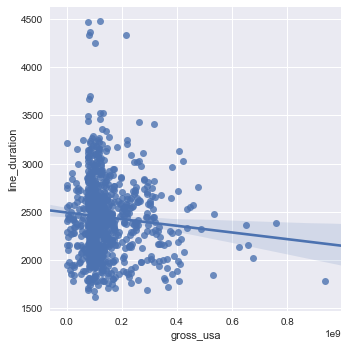

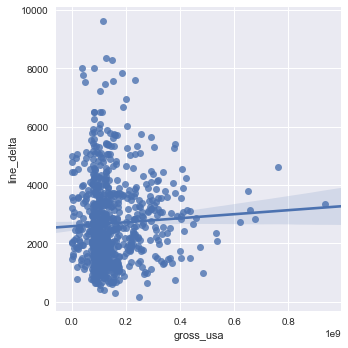

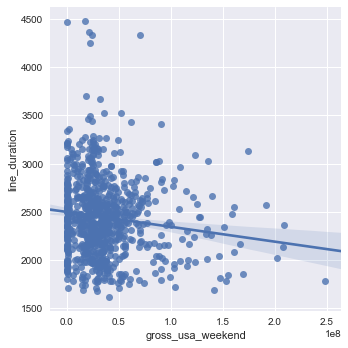

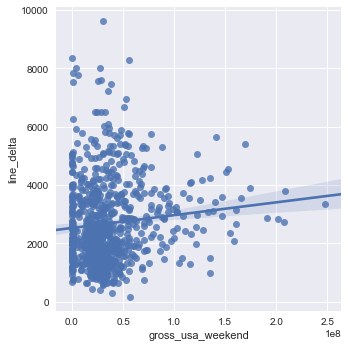

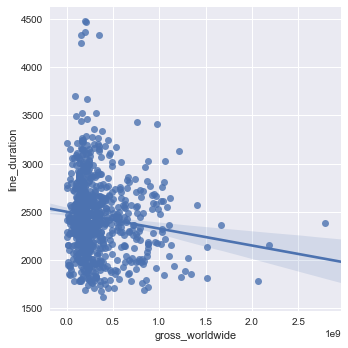

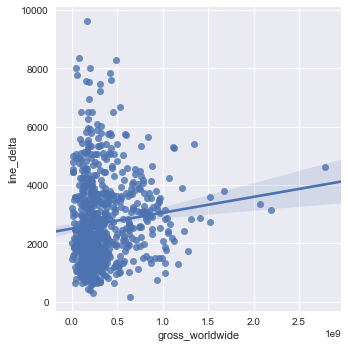

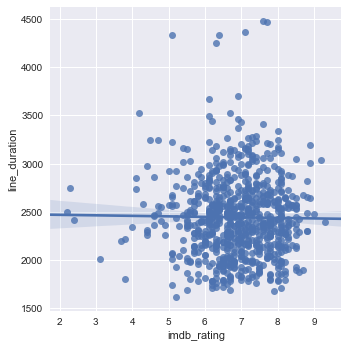

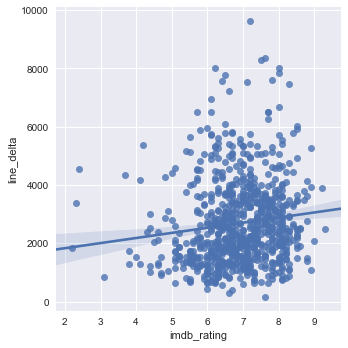

In [11]:
from matplotlib import rcParams
import seaborn as sns

plt.style.use('fivethirtyeight')

sns.set(rc={'figure.figsize':(11.7,8.27)})
rcParams['figure.figsize'] = 11.7,8.27
#df_test = df_test[(df_test['budget'] < 500000000) & (df_test['gross_usa'] < 4000000000) & (df_test['gross_usa_weekend'] < 500000000) & (df_test['gross_worldwide'] < 100000000) & (df_test['imdb_rating'] < 8)]

sns.lmplot(x='budget',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='budget',y='line_delta',data=df_submov_bytitle,fit_reg=True) 


sns.lmplot(x='gross_usa',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='gross_usa',y='line_delta',data=df_submov_bytitle,fit_reg=True) 


sns.lmplot(x='gross_usa_weekend',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='gross_usa_weekend',y='line_delta',data=df_submov_bytitle,fit_reg=True) 

sns.lmplot(x='gross_worldwide',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='gross_worldwide',y='line_delta',data=df_submov_bytitle,fit_reg=True) 

sns.lmplot(x='imdb_rating',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
sns.lmplot(x='imdb_rating',y='line_delta',data=df_submov_bytitle,fit_reg=True) 

#sns.lmplot(x='imdb_popularity',y='line_duration',data=df_submov_bytitle,fit_reg=True) 
#sns.lmplot(x='imdb_popularity',y='line_delta',data=df_submov_bytitle,fit_reg=True) 

## Test correlation

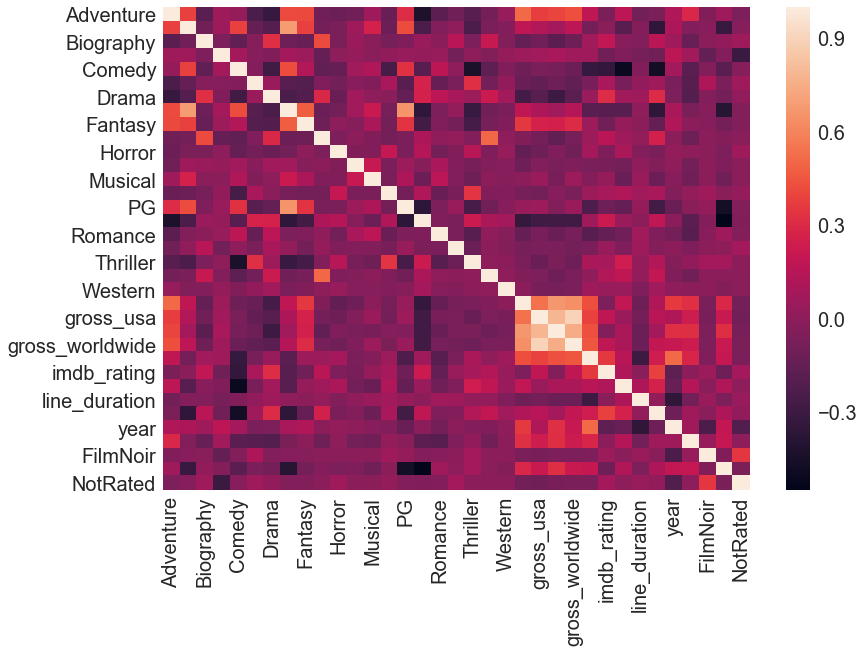

In [117]:
sns.heatmap(df_submov_bytitle.corr())

## Generate pairplot

In [13]:
import seaborn as sns
df_submov_bytitle = df_submov_bytitle[df_submov_bytitle.columns.difference(['metacritic_rating'])]
sns.set(font_scale=2)
df_submov_bytitle = df_submov_bytitle.reset_index()

# sns.pairplot(df_submov_bytitle[df_submov_bytitle['year'] > 1950],size = 4)
# df_submov_bytitle

In [13]:
#df_submov_bytitle[df_submov_bytitle['title'].str.contains('xXx')]
df_submov_bytitle['SciFi'] = df_submov_bytitle['Sci-Fi']
df_submov_bytitle['FilmNoir'] = df_submov_bytitle['Film-Noir']
df_submov_bytitle['PG13'] = df_submov_bytitle['PG-13']
df_submov_bytitle['NotRated'] = df_submov_bytitle['Not Rated']
df_submov_bytitle =df_submov_bytitle.drop(['Sci-Fi','Film-Noir','PG-13','Not Rated'],axis=1) 

## Generate linear model
Using sklearn for modle and statsmodels for ols 

# Model with Patsy

In [14]:
# Formula variables
imdb_formula = "year + budget+gross_usa + gross_usa_weekend + gross_worldwide + imdb_rating+imdb_critic_reviews_total"
genre_formula  = "+Adventure+Animation+Biography+Color+Comedy+Crime+Drama+Family+Fantasy+FilmNoir+History+Horror+Music+Musical+Mystery+Romance+SciFi+Sport+Thriller+War+Western"
ratings_formula = "+R+PG13+NotRated"
regression_formula = imdb_formula + genre_formula + ratings_formula

In [16]:
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# Filter and scale data
from sklearn import preprocessing, linear_model, pipeline
from sklearn.preprocessing import StandardScaler

# Filter data
'''
df_r = df_submov_bytitle[(df_submov_bytitle['year'] > 1950)  & 
                         (df_submov_bytitle['line_duration'] <3000) &
                         (df_submov_bytitle['line_duration'] >2000) ]
'''

#df_submov_bytitle
scalar = StandardScaler()
#df_submov_bytitle = df_submov_bytitle.drop('title',axis=1)

df_scaled = scalar.fit_transform(df_submov_bytitle)
df_scaled = pd.DataFrame(df_scaled,columns=df_submov_bytitle.columns)
df_scaled

# Create patsy matrix 
y, X = patsy.dmatrices("line_duration ~"+regression_formula, data=df_scaled, return_type="dataframe")

lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)


# Plot
#fig = sm.graphics.plot_regress_exog(model, "year", fig=fig)



/Users/justinblinder/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.18384227255320984

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less

train: 0.162, test: 0.114


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

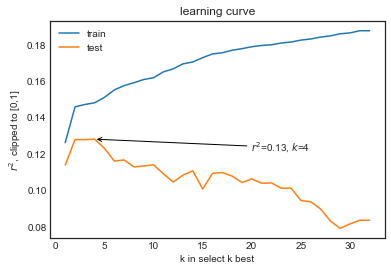

In [17]:
from sklearn import pipeline, feature_selection, model_selection, linear_model, preprocessing
select_pipe = pipeline.Pipeline(
    # some features have missing values so this fills in the mean for them
    # this imputer is lazy and often helpful but not always the best option
    [("imp", preprocessing.Imputer()), 
     # scale our features before linear models. it's good data hygiene 
     ("std", preprocessing.StandardScaler()),
     # we'll use select k best to adjust model complexity
     ("select",
      feature_selection.SelectKBest(
          score_func=feature_selection.f_regression)), 
     # our old friend <3
     ("lin", linear_model.LinearRegression())
    ])

select_pipe.fit(X,y)
select_pipe.score(X,y)

feat_support = select_pipe.named_steps["select"].get_support()
feat = X.columns[feat_support]
coef = select_pipe.named_steps["lin"].coef_



cv_result = model_selection.cross_validate(
        select_pipe, X=X, y=y, cv=10, return_train_score=True)
print(f"train: {np.mean(cv_result['train_score']):.3}, test: {np.mean(cv_result['test_score']):.3}")
#figsize(15, 8)


train_scores = []
test_scores = []
# define feature range
num_feats = len(X.columns)
feat_range = np.arange(num_feats)+1
# for each k in feat_range
for num_f in feat_range:
    # set pipeline params
    select_pipe.set_params(select__k=num_f)
    # get cross val scores
    cv_result = model_selection.cross_validate(
        select_pipe, X=X, y=y, cv=10, return_train_score=True)
    train_scores.append(np.maximum(np.mean(cv_result['train_score']), 0))
    test_scores.append(np.maximum(np.mean(cv_result['test_score']), 0))

# plot test vs train
plt.plot(feat_range, train_scores, label="train")
plt.plot(feat_range, test_scores, label="test")

# find index of best score
best_i = np.argmax(test_scores)
# annotate score
ann_xy = (feat_range[best_i], test_scores[best_i])
ann_text = f"$r^2$={test_scores[best_i]:.2}, $k$={feat_range[best_i]}"
plt.annotate(ann_text, xy=ann_xy, xytext=(.6,.4), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            )

plt.xlabel("k in select k best")
plt.ylabel("$r^2$, clipped to [0,1]")
plt.title("learning curve")
plt.legend();
#ASK: Is this accurate: in the middle?

# Model with Statsmodels 

In [81]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#### Perform Test Train Split

In [99]:
X = df_submov_bytitle.loc[:, df_submov_bytitle.columns != 'line_duration'] # 
y = df_submov_bytitle['line_duration'] # Choose the response variable


'''
n_pols = 11

# Step through degrees from 0 to 9 and store the training and test (generalization) error.
train_error = np.empty(n_pols)
test_error = np.empty(n_pols)
mean_coef = np.empty(n_pols)
n_feat = np.empty(n_pols)

for degree in range(n_pols):
    est = pipeline.make_pipeline(preprocessing.PolynomialFeatures(degree), linear_model.LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))    
    mean_coef[degree] = mean(abs(est.get_params()['linearregression'].coef_))

# Plot the training and test errors against degree
fig, axes = subplots(nrows=2, ncols=1, squeeze=True, figsize=(6,8))

axes[0].plot(np.arange(n_pols), train_error, label='train', color=colors[0])
axes[0].plot(np.arange(n_pols), test_error, label='test', color=colors[1])
# plt.ylim((0, n_pols))
axes[0].set_ylabel('log(mean squared error)')
axes[0].set_xlabel('complexity →')
axes[0].legend(loc='upper left')

axes[1].set_xlabel('degree')
axes[1].set_ylabel('mean(abs(coefficients))')
axes[1].semilogy(np.arange(n_pols), mean_coef);

plt.savefig("complexity.pdf")
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test

lr_split = LinearRegression(fit_intercept=True)
lr_split.fit(X_train, y_train)
train_score = lr_split.score(X_train,y_train)
test_score = lr_split.score(X_test,y_test)
print(f'train: {train_score}, test:{test_score}')


train: 0.21490518361886268, test:0.052929379745767724


In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
k_folds = KFold(n_splits=20, shuffle=True)

# 10-fold cross-validation with our fake data
reg = linear_model.LinearRegression()
scores = cross_val_score(reg, X, y, cv=k_folds, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

y_pred = cross_val_predict(reg, X, y, cv=k_folds)

np.mean(-scores)


[163067.85755684 273853.38418135 252243.49505246 183992.55315085
 150097.58252684 166594.90530718 171911.79279636 150717.47753791
 141913.61799396 102953.5023193  142501.88463593 112812.58062248
 168491.57471471  94660.7486153  296831.32277892  98939.53656036
 101804.9550195   98516.15623713  88043.3369045  102208.82188413]


153107.8543198005

### Create model with Sklearn and statsmodels

0.194547639795412

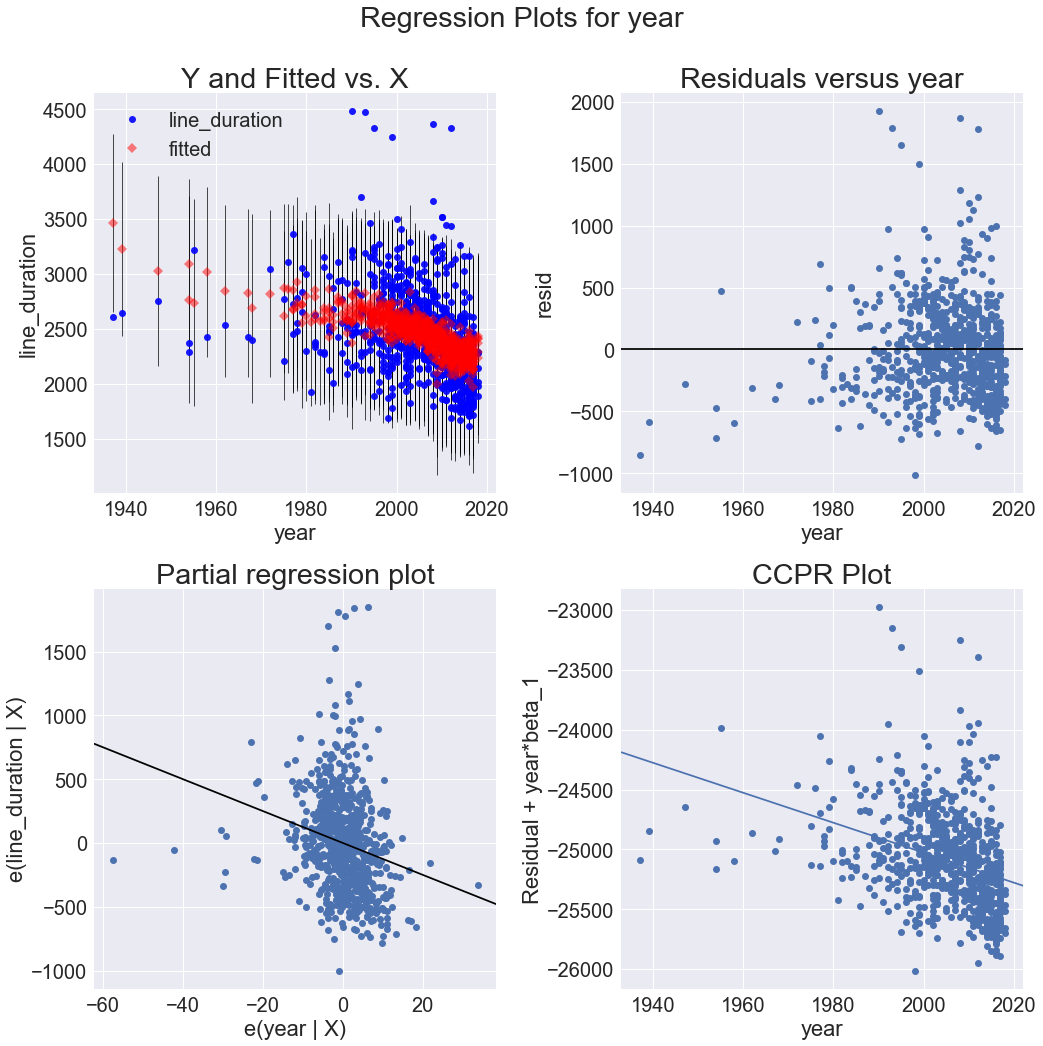

In [115]:
df_r = df_submov_bytitle

# Create an empty model
lr = LinearRegression()
df_r = df_r.reset_index()
#df_r = df_r.drop('title',axis=1)

# Choose predictor variables
X = df_r.loc[:, df_r.columns != 'line_duration']

# Choose response variable(s)
y = df_r['line_duration']

# Fit the model to the full dataset
lr.fit(X,y)

model = ols("line_duration ~"+ regression_formula, data=df_r).fit()
fig = plt.figure(figsize=(15,15))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "year", fig=fig)
lr.score(X,y)


In [114]:
# same as above, just using more straightforward OLS method from statsmodels
model = sm.OLS(y,X)
results = model.fit()
results.summary()
#fig = sm.graphics.plot_regress_exog(results, "year", fig=fig)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          line_duration   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     904.2
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:15:48   Log-Likelihood:                -5857.1
No. Observations:                 796   AIC:                         1.178e+04
Df Residuals:                     761   BIC:                         1.195e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
index                         0.1050      0.062      1.708      0.088      -0.016       0.226
Adventure                   -71.8355     41.945     -1.713      0.087    -154.177      10.506
Animation                   -53.8260     65.254     -0.825      0.410    -181.925      74.273
Biography                  -110.5886     70.036     -1.579      0.115    -248.075      26.898
Color                       -68.0454     91.932     -0.740      0.459    -248.515     112.424
Comedy                      -56.3156     45.304     -1.243      0.214    -145.251      32.619
Crime                       -20.9910     44.340     -0.473      0.636    -108.035      66.053
Drama                        26.7707     37.225      0.719      0.472     -46.305      99.846
Family                        6.1672     66.118      0.093      0.926    -123.629     135.963
Fantasy                      35.1744     42.151      0.834      0.404     -47.573     117.921
History                      96.1048     84.283      1.140      0.255     -69.350     261.559
Horror                      -57.7035     68.869     -0.838      0.402    -192.899      77.492
Music                       -17.7504     83.476     -0.213      0.832    -181.622     146.121
Musical                     141.6728     86.293      1.642      0.101     -27.727     311.072
Mystery                      79.5271     46.964      1.693      0.091     -12.668     171.722
PG                          -95.5088     76.993     -1.240      0.215    -246.653      55.635
R                          -123.3259     97.937     -1.259      0.208    -315.585      68.934
Romance                      12.8122     43.534      0.294      0.769     -72.649      98.273
Sport                        76.7394     79.975      0.960      0.338     -80.258     233.737
Thriller                     -0.3266     40.032     -0.008      0.993     -78.913      78.260
War                        -104.2179     82.483     -1.264      0.207    -266.138      57.703
Western                     -76.5101     92.780     -0.825      0.410    -258.645     105.625
budget                     3.973e-07   4.05e-07      0.981      0.327   -3.98e-07    1.19e-06
gross_usa                  8.199e-07   3.77e-07      2.176      0.030    8.01e-08    1.56e-06
gross_usa_weekend         -1.801e-07   8.35e-07     -0.216      0.829   -1.82e-06    1.46e-06
gross_worldwide           -2.564e-07   1.29e-07     -1.990      0.047   -5.09e-07   -3.49e-09
imdb_critic_reviews_total    -0.9709      0.122     -7.958      0.000      -1.210      -0.731
imdb_rating                  27.9878     18.880      1.482      0.139      -9.075      65.051
line_delta                    0.0430      0.012      3.663      0.000       0.020       0.066
runtime                       0.2912      0.634      0.460      0.646      

In [ ]:
lsm = smf.ols('line_duration ~ year', data = df_r)
fit1 = lsm.fit()
fit1.summary().as_sv()


In [23]:
# Bringing in our helper functions

def f(x):
    return np.sin(2 * np.pi * x)

def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

x_plot = np.linspace(0, 1, 100)

colors = sns.hls_palette(2)

n_steps = 100
degree = 9
a_exp = linspace(-15, 1, num=n_steps)
alpha_range = [10**a for a in a_exp]

train_error = np.empty(n_steps)
test_error = np.empty(n_steps)
coefs = []

for i, alpha in enumerate(alpha_range):
    est = pipeline.make_pipeline(
        preprocessing.PolynomialFeatures(degree),
        linear_model.Ridge(alpha=alpha, normalize=True))
    est.fit(X_train, y_train)

    train_error[i] = mean_squared_error(y_train, est.predict(X_train))
    test_error[i] = mean_squared_error(y_test, est.predict(X_test))
    coefs.append(est.get_params()['ridge'].coef_)

#     train_error[i] = est.score(X_train, y_train)
#     test_error[i] = est.score(X_test, y_test)

# Plot the training and test errors against degree

fig, axes = subplots(
    nrows=2, ncols=1, squeeze=True, figsize=(20, 16), sharex=True)

axes[0].plot(alpha_range, train_error, label='train', color=colors[0])
axes[0].plot(alpha_range, test_error, label='test', color=colors[1])
axes[0].set_ylabel('log(mean squared error)')
axes[0].set_xlabel('capacity ->')
axes[0].legend(loc='upper right')

axes[1].plot(alpha_range, squeeze(coefs, axis=1))
axes[1].set_yscale("symlog")
axes[1].set_xscale("log")
axes[1].set_xlim(reversed(axes[1].get_xlim())) # reverses x axis
axes[1].set_ylabel("coefficient magnitude")

NameError: name 'linspace' is not defined